## Viewing Results

In [111]:
import os
import scanpy as sc

home = '/home/kojo/Code/Alz_trVAE'
os.chdir(home)

In [112]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from scipy import sparse
from scipy import stats
from matplotlib import pyplot as plt
import reptrvae

In [113]:
sc.set_figure_params(dpi=200)

In [114]:
path_to_save = "./results/alzPro-time/"
sc.settings.figdir = path_to_save

In [115]:
combination = 'U'
normalized = False
specific_cell_type = "all"

In [116]:
conditions = ["3m", "6m", "9m"]
source_condition = "3m"
target_condition = "9m"
cell_type_key = "Group"
condition_key = "Timepoint"

In [117]:
adata = sc.read(f"./data/alzPro_{'normalized' if normalized else 'count'}_{combination}.h5ad")
#adata.uns['log1p']["base"] = None
adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [118]:
adata.X.min(), adata.X.max()

(0.0, 443000000.0)

In [119]:
if specific_cell_type != 'all':
    cell_type_adata = adata[adata.obs[cell_type_key] == specific_cell_type]
else:
    cell_type_adata = adata
#cell_type_adata.uns['log1p']["base"] = None
cell_type_adata

AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation'

In [120]:
cell_type_adata.X[0][1550]

429000.0

In [121]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == source_condition]
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]

In [122]:
ctrl_adata.obs['method'] = source_condition
real_adata.obs['method'] = target_condition

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


In [123]:
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPro-time/{specific_cell_type}_{source_condition}_to_{target_condition}_{'norm' if normalized else 'count'}_{combination}.h5ad")
#trvae_reconstructed.uns['log1p']["base"] = None
trvae_reconstructed

AnnData object with n_obs × n_vars = 32 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'batch'

In [124]:
trvae_reconstructed.X[0][1550]

373331.38

In [125]:
trvae_reconstructed.X[:8].min(), trvae_reconstructed.X[:8].max()

(0.0, 46468556.0)

In [126]:
trvae_reconstructed.obs

,Qi ID,sex,Group,Timepoint,Validation,batch
0-0,3131,M,all,3m_to_9m,Test,0
1-0,3132,M,all,3m_to_9m,Train,0
2-0,3140,M,all,3m_to_9m,Train,0
3-0,3141,M,all,3m_to_9m,Train,0
4-0,3153,F,all,3m_to_9m,Test,0
5-0,3154,F,all,3m_to_9m,Train,0
6-0,3156,F,all,3m_to_9m,Train,0
7-0,3157,F,all,3m_to_9m,Train,0
8-0,3346,F,all,3m_to_9m,Test,0
9-0,3347,F,all,3m_to_9m,Train,0


In [127]:
trvae_pred = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == f"{source_condition}_to_{target_condition}"]
trvae_pred.var = ctrl_adata.var
trvae_pred.obs['method'] = 'trVAE'

In [128]:
trvae_pred.obs

,Qi ID,sex,Group,Timepoint,Validation,batch,method
0-0,3131,M,all,3m_to_9m,Test,0,trVAE
1-0,3132,M,all,3m_to_9m,Train,0,trVAE
2-0,3140,M,all,3m_to_9m,Train,0,trVAE
3-0,3141,M,all,3m_to_9m,Train,0,trVAE
4-0,3153,F,all,3m_to_9m,Test,0,trVAE
5-0,3154,F,all,3m_to_9m,Train,0,trVAE
6-0,3156,F,all,3m_to_9m,Train,0,trVAE
7-0,3157,F,all,3m_to_9m,Train,0,trVAE
8-0,3346,F,all,3m_to_9m,Test,0,trVAE
9-0,3347,F,all,3m_to_9m,Train,0,trVAE


In [129]:
models = ctrl_adata.concatenate(real_adata, trvae_pred)
models.obs['method'].unique()

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


array(['3m', '9m', 'trVAE'], dtype=object)

In [130]:
models.var_names

Index(['A2A432|CUL4B', 'A2A5R2|BIG2', 'A2A699|F1712', 'A2A7S8|K1522',
       'A2A8L1|CHD5', 'A2A8L5|PTPRF', 'A2ADY9|DDI2', 'A2AG50|MA7D2',
       'A2AGT5|CKAP5', 'A2AJA9|AJM1',
       ...
       'Q9Z2U0|PSA7', 'Q9Z2U1|PSA5', 'Q9Z2U2|ZN292', 'Q9Z2V5|HDAC6',
       'Q9Z2W0|DNPEP', 'Q9Z2W8|GRIA4', 'Q9Z2W9|GRIA3', 'Q9Z2X1|HNRPF',
       'Q9Z2Y3|HOME1', 'Q9Z2Y8|PLPHP'],
      dtype='object', name='Accession', length=2969)

In [131]:
sc.tl.rank_genes_groups(models, reference=target_condition, 
                       groupby="method", groups=['trVAE'],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(models, reference='trVAE',
                         groupby="method", groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = models.uns['up_reg_genes']['names']['trVAE']
down_genes = models.uns['down_reg_genes']['names'][target_condition]

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9


In [132]:
models.obs

,Qi ID,sex,Group,Timepoint,Validation,method,batch
0-0,3131,M,HET,3m,Test,3m,0
1-0,3132,M,HET,3m,Train,3m,0
2-0,3140,M,HET,3m,Train,3m,0
3-0,3141,M,HET,3m,Train,3m,0
4-0,3153,F,HET,3m,Test,3m,0
5-0,3154,F,HET,3m,Train,3m,0
6-0,3156,F,HET,3m,Train,3m,0
7-0,3157,F,HET,3m,Train,3m,0
8-0,3346,F,WT,3m,Test,3m,0
9-0,3347,F,WT,3m,Train,3m,0


In [133]:
protein_up = up_genes[0]
print(protein_up)

Q9CRB2|NHP2


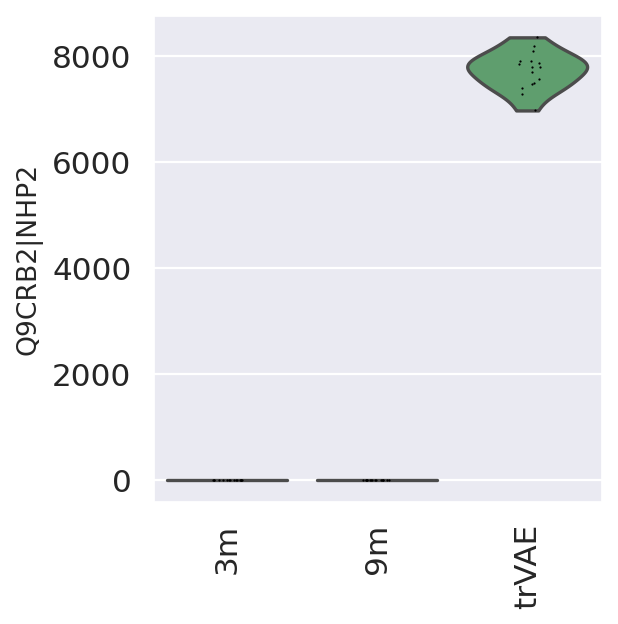

In [134]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_best_model_cmpr.pdf",
             jitter=True,
            )

In [135]:
protein_down = down_genes[0]
print(protein_down)

Q9D2N9|VP33A


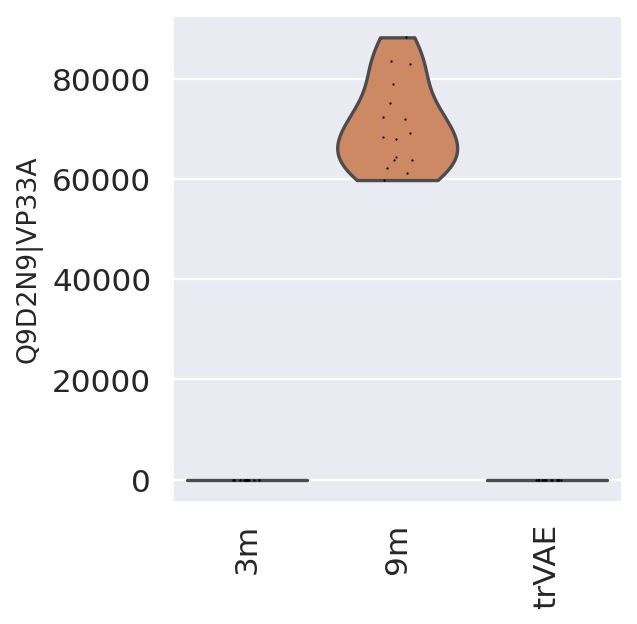

In [136]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_worst_model_cmpr.pdf",
             jitter=True,
            )

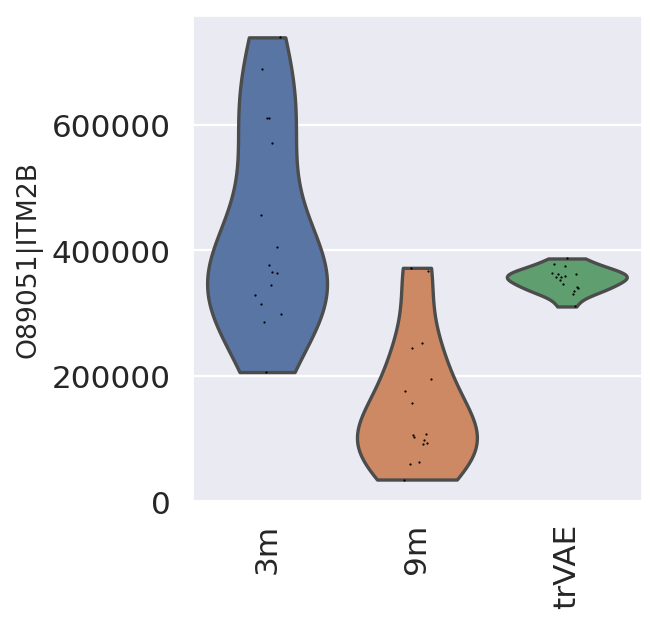

In [137]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="O89051|ITM2B", 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_model_cmpr.pdf",
             jitter=True,
            )

### R^2 Plots

In [138]:
adata_pred = ctrl_adata.concatenate(real_adata, trvae_pred)
#adata_pred.uns['log1p']["base"] = None
adata_pred

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 48 × 2969
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Validation', 'method', 'batch'

In [139]:
adata_pred.obs[condition_key].unique()

array(['3m', '9m', '3m_to_9m'], dtype=object)

In [140]:
#"""
sc.tl.rank_genes_groups(cell_type_adata, reference=target_condition, 
                       groupby=condition_key, groups=[source_condition],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(cell_type_adata, reference=source_condition,
                         groupby=condition_key, groups=[target_condition],
                         key_added='down_reg_genes', n_genes=50)
up_genes = cell_type_adata.uns['up_reg_genes']['names'][source_condition]
down_genes = cell_type_adata.uns['down_reg_genes']['names'][target_condition]
#"""

/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kojo/miniconda3/envs/trVAE/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9


In [141]:
up_genes_pairs = {}
for i in range(50):
    up_genes_pairs[cell_type_adata.uns['up_reg_genes']['names'][source_condition][i]] = cell_type_adata.uns['up_reg_genes']['scores'][source_condition][i]
up_genes_pairs

{'P97493|THIOM': 34.137753,
 'Q8K274|KT3K': 32.253895,
 'P35283|RAB12': 30.829126,
 'Q9JK81|MYG1': 30.698582,
 'P70335|ROCK1': 29.66455,
 'Q8BHE3|ATCAY': 29.544535,
 'O70492|SNX3': 28.62335,
 'P61255|RL26': 27.516575,
 'P63087|PP1G': 27.449522,
 'P62754|RS6': 27.362423,
 'P35802|GPM6A': 27.267889,
 'O08759|UBE3A': 26.714195,
 'D3YZI9|PGBD5': 26.627953,
 'P24529|TY3H': 26.58579,
 'Q99LI2|CLCC1': 25.43484,
 'Q80ZI6|LRSM1': 25.055779,
 'Q9D618|KBTBC': 24.98234,
 'Q9JIG8|PRAF2': 24.768406,
 'P10630|IF4A2': 24.717453,
 'P12970|RL7A': 24.705278,
 'Q8CIE6|COPA': 24.689379,
 'O55142|RL35A': 24.647831,
 'Q99LF4|RTCB': 24.382341,
 'Q9D4C9|CLVS1': 24.204483,
 'P61759|PFD3': 23.965652,
 'Q8BTI8|SRRM2': 23.70351,
 'P63073|IF4E': 23.65825,
 'Q8JZU2|TXTP': 23.404177,
 'Q9JKC6|CEND': 23.193336,
 'Q9QXS1|PLEC': 22.950872,
 'Q9DCN2|NB5R3': 22.877337,
 'Q6ZWR6|SYNE1': 22.64378,
 'Q64433|CH10': 21.979355,
 'Q8C8R3|ANK2': 21.92927,
 'Q8BQP9|R7BP': 21.921738,
 'Q9D1K7|CT027': 21.836483,
 'Q8R0A5|TCAL3': 21.

In [142]:
down_genes_pairs = {}
for i in range(50):
    down_genes_pairs[cell_type_adata.uns['down_reg_genes']['names'][target_condition][i]] = cell_type_adata.uns['down_reg_genes']['scores'][target_condition][i]
down_genes_pairs

{'Q9D2N9|VP33A': 32.527325,
 'Q9CZ04|CSN7A': 26.17775,
 'Q8R1T1|CHMP7': 25.777678,
 'Q9CXR1|DHRS7': 25.120735,
 'Q9R069|BCAM': 24.599144,
 'P27048|RSMB': 24.464945,
 'P55258|RAB8A': 24.349,
 'Q921H8|THIKA': 24.2555,
 'Q9D7X8|GGCT': 23.691423,
 'Q9QXK3|COPG2': 23.60326,
 'Q8VBX6|MPDZ': 23.508322,
 'Q8CG79|ASPP2': 23.301159,
 'Q60972|RBBP4': 23.040104,
 'Q3UMU9|HDGR2': 22.840298,
 'Q9QUJ7|ACSL4': 22.66911,
 'P58404|STRN4': 22.54175,
 'O88448|KLC2': 22.317501,
 'E9Q414|APOB': 22.169876,
 'Q6ZPE2|MTMR5': 21.794054,
 'Q99LD9|EI2BB': 21.446217,
 'P97765|WBP2': 21.431774,
 'Q8C754|VPS52': 21.321453,
 'Q3U0M1|TPPC9': 21.246275,
 'Q8R361|RFIP5': 20.915062,
 'O88532|ZFR': 20.63483,
 'Q922B1|MACD1': 20.562544,
 'Q91VM5|RMXL1': 20.2897,
 'P23591|FCL': 20.214231,
 'Q6ZWR4|2ABB': 20.10718,
 'O08989|RASM': 19.961535,
 'Q8CG70|P3H3': 19.958086,
 'Q8C5H8|NAKD2': 19.803785,
 'Q9QX60|DGUOK': 19.628939,
 'Q60759|GCDH': 19.529715,
 'Q62241|RU1C': 19.344368,
 'Q8VE62|PAIP1': 19.328953,
 'Q8C2Q3|RBM14': 19.3

In [143]:
top_genes = up_genes.tolist() + down_genes.tolist()

In [144]:
len(top_genes)

100

In [145]:
protein_up = up_genes[0]
print(protein_up)

P97493|THIOM


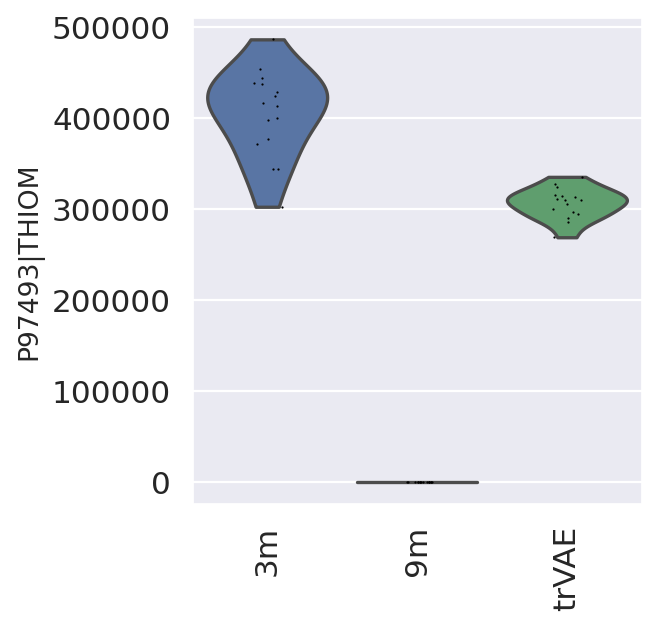

In [146]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_up, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_best_model_cmpr.pdf",
             jitter=True,
            )

In [147]:
protein_down = down_genes[0]
print(protein_down)

Q9D2N9|VP33A


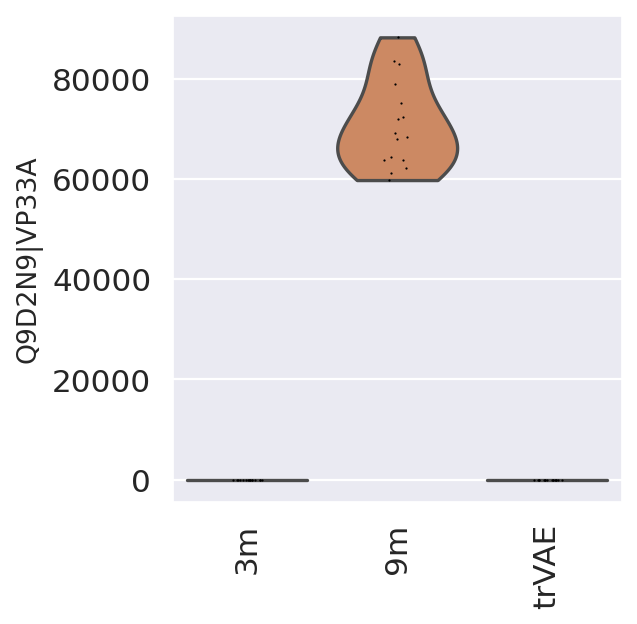

In [148]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys=protein_down, 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_standard_worst_model_cmpr.pdf",
             jitter=True,
            )

In [149]:
#top_genes = up_genes.tolist() + down_genes.tolist()

reg_mean_top100: 0.7913196097198072
reg_mean_all: 0.7302878611444996


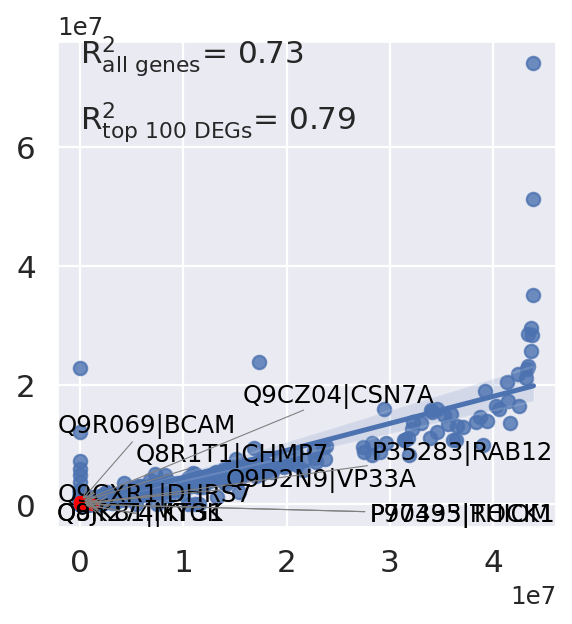

In [150]:
reptrvae.pl.reg_mean_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_{source_condition}_to_{target_condition}_{'normalized' if normalized else 'count'}_{combination}_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_top100: 0.740438844351729
reg_var_all: 0.16467570088536157


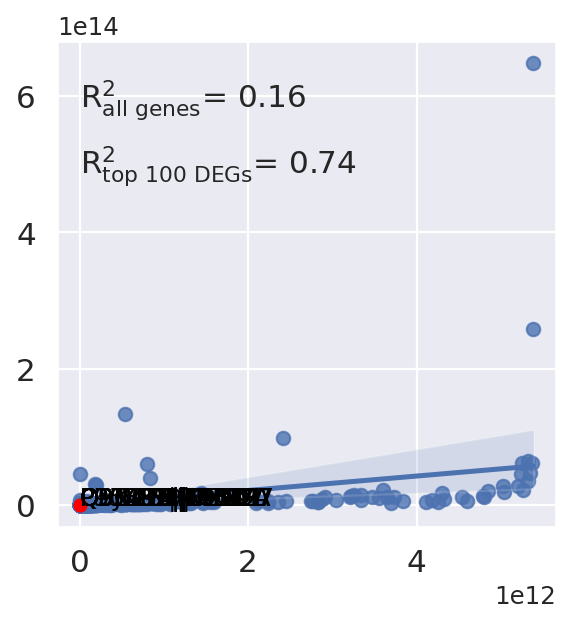

In [151]:
reptrvae.pl.reg_var_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"{source_condition}_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_{source_condition}_to_{target_condition}_{'normalized' if normalized else 'count'}_{combination}_reg_var.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.1)

In [152]:
up_genes.tolist()

['P97493|THIOM',
 'Q8K274|KT3K',
 'P35283|RAB12',
 'Q9JK81|MYG1',
 'P70335|ROCK1',
 'Q8BHE3|ATCAY',
 'O70492|SNX3',
 'P61255|RL26',
 'P63087|PP1G',
 'P62754|RS6',
 'P35802|GPM6A',
 'O08759|UBE3A',
 'D3YZI9|PGBD5',
 'P24529|TY3H',
 'Q99LI2|CLCC1',
 'Q80ZI6|LRSM1',
 'Q9D618|KBTBC',
 'Q9JIG8|PRAF2',
 'P10630|IF4A2',
 'P12970|RL7A',
 'Q8CIE6|COPA',
 'O55142|RL35A',
 'Q99LF4|RTCB',
 'Q9D4C9|CLVS1',
 'P61759|PFD3',
 'Q8BTI8|SRRM2',
 'P63073|IF4E',
 'Q8JZU2|TXTP',
 'Q9JKC6|CEND',
 'Q9QXS1|PLEC',
 'Q9DCN2|NB5R3',
 'Q6ZWR6|SYNE1',
 'Q64433|CH10',
 'Q8C8R3|ANK2',
 'Q8BQP9|R7BP',
 'Q9D1K7|CT027',
 'Q8R0A5|TCAL3',
 'P14115|RL27A',
 'P62196|PRS8',
 'P63242|IF5A1',
 'O35280|CHK1',
 'Q62205|SCN9A',
 'Q99104|MYO5A',
 'P0DP27|CALM2',
 'Q9D882|F241B',
 'Q64345|IFIT3',
 'P61750|ARF4',
 'Q9CY50|SSRA',
 'Q69ZT1|FAN1',
 'Q91WK2|EIF3H']

In [153]:
down_genes.tolist()

['Q9D2N9|VP33A',
 'Q9CZ04|CSN7A',
 'Q8R1T1|CHMP7',
 'Q9CXR1|DHRS7',
 'Q9R069|BCAM',
 'P27048|RSMB',
 'P55258|RAB8A',
 'Q921H8|THIKA',
 'Q9D7X8|GGCT',
 'Q9QXK3|COPG2',
 'Q8VBX6|MPDZ',
 'Q8CG79|ASPP2',
 'Q60972|RBBP4',
 'Q3UMU9|HDGR2',
 'Q9QUJ7|ACSL4',
 'P58404|STRN4',
 'O88448|KLC2',
 'E9Q414|APOB',
 'Q6ZPE2|MTMR5',
 'Q99LD9|EI2BB',
 'P97765|WBP2',
 'Q8C754|VPS52',
 'Q3U0M1|TPPC9',
 'Q8R361|RFIP5',
 'O88532|ZFR',
 'Q922B1|MACD1',
 'Q91VM5|RMXL1',
 'P23591|FCL',
 'Q6ZWR4|2ABB',
 'O08989|RASM',
 'Q8CG70|P3H3',
 'Q8C5H8|NAKD2',
 'Q9QX60|DGUOK',
 'Q60759|GCDH',
 'Q62241|RU1C',
 'Q8VE62|PAIP1',
 'Q8C2Q3|RBM14',
 'Q9DCM2|GSTK1',
 'O88986|KBL',
 'A2A7S8|K1522',
 'Q5DU25|IQEC2',
 'Q9D906|ATG7',
 'P24452|CAPG',
 'Q62523|ZYX',
 'Q9JIY5|HTRA2',
 'Q63932|MP2K2',
 'Q8BHG2|CA123',
 'Q9R0A0|PEX14',
 'Q91VF2|HNMT',
 'Q04863|RELB']

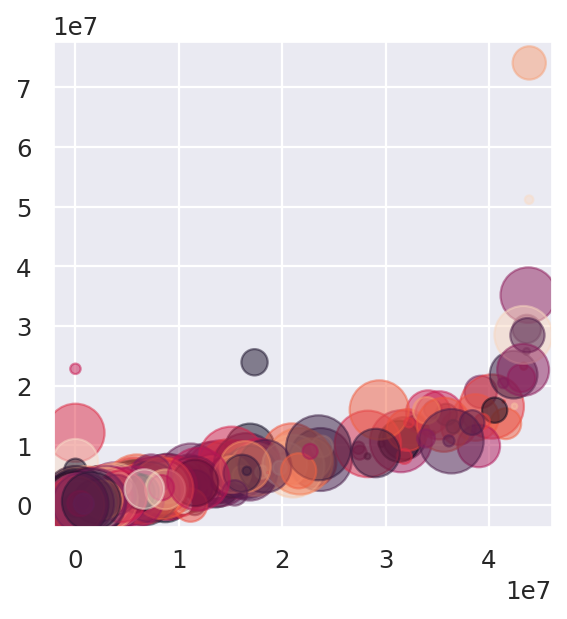

In [154]:
np.random.seed(2432532)

N = len(trvae_pred.X[0])
#x = list(protein_meansP.keys())
x = [sum(trvae_pred.X[:,i])/len(trvae_pred.X[:,i]) for i in range(len(trvae_pred.X[0]))]
#y = list(protein_meansR.keys())
y = [sum(real_adata.X[:,i])/len(real_adata.X[:,i]) for i in range(len(real_adata.X[0]))]
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [155]:
means = pd.DataFrame(list(zip(x, y)), columns=['Predicted', 'Actual'])
means.head()

,Predicted,Actual
0,227904.044922,69700.00
1,0.000000,59681.25
2,425912.302734,142318.75
3,0.000000,26487.50
4,168420.111328,0.00


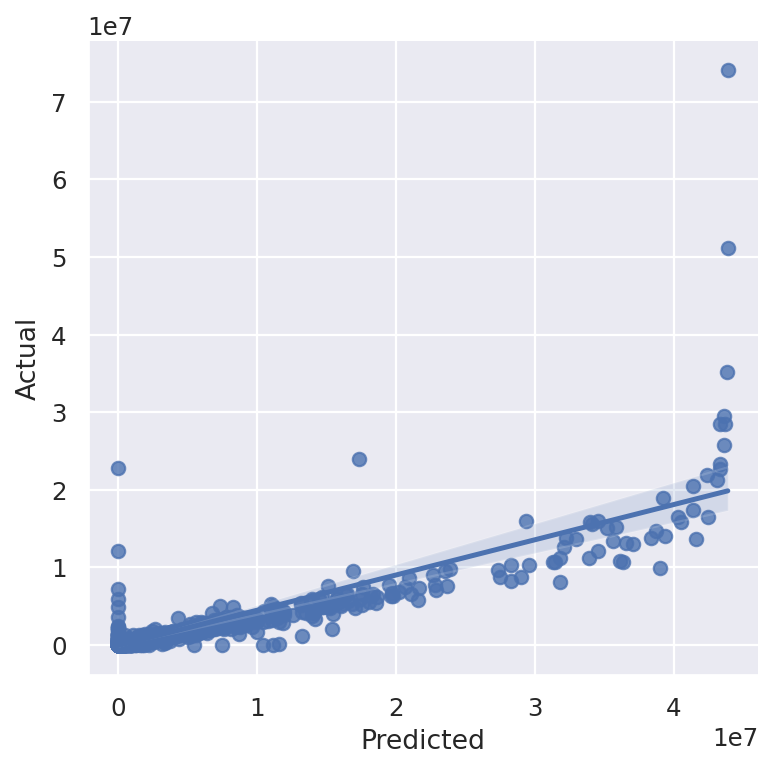

In [156]:
import seaborn as sb

sb.lmplot(x='Predicted', y='Actual', data=means)

In [157]:
stats.pearsonr(x, y)

(0.8545688097204839, 0.0)

In [158]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.8068923878245172, pvalue=0.0)